### Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/AN2DL/ExerciseSession1

/gdrive/My Drive/AN2DL/ExerciseSession1


### Import libraries

In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.8.2


### Set seed for reproducibility

In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

### Load data 

**Boston Housing Dataset**

Features:

* **CRIM**:     per capita crime rate by town
* **ZN**:       proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**:    proportion of non-retail business acres per town
* **CHAS**:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**:      nitric oxides concentration (parts per 10 million)
* **RM**:       average number of rooms per dwelling
* **AGE**:      proportion of owner-occupied units built prior to 1940
* **DIS**:      weighted distances to five Boston employment centres
* **RAD**:      index of accessibility to radial highways
* **TAX**:      full-value property-tax rate per \$10,000
* **PTRATIO**:  pupil-teacher ratio by town
* **B**:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT**:    % lower status of the population

Target:

* **MEDV**:     Median value of owner-occupied homes in $1000's


In [ ]:
data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston_dataset = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=['MEDV'])
print('Boston dataset shape',boston_dataset.shape)
print('Target shape', target.shape)
boston_dataset.describe()

Boston dataset shape (506, 13)
Target shape (506, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Split in train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston_dataset, target, test_size = 0.2, random_state=seed)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404, 1)
(102, 13) (102, 1)


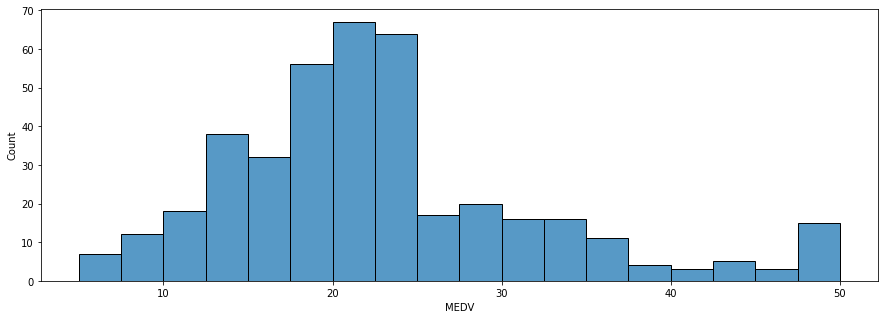

In [ ]:
# Inspect the target
plt.figure(figsize=(15,5))
sns.histplot(data=y_train, x='MEDV')
plt.show()

### Process data

In [ ]:
# Normalize both features and target
max_df = X_train.max()
min_df = X_train.min()
max_t = y_train.max()
min_t = y_train.min()

X_train = (X_train - min_df)/(max_df - min_df)
y_train = (y_train - min_t)/(max_t - min_t)

print('Dataset shape', X_train.shape)
print('Target shape', y_train.shape)
X_train.describe()

Dataset shape (404, 13)
Target shape (404, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.040465,0.115693,0.379446,0.071782,0.352848,0.498859,0.676173,0.243577,0.363323,0.414184,0.608332,0.897570,0.296009
std,0.099757,0.231525,0.255356,0.258447,0.242190,0.144285,0.288310,0.193802,0.373466,0.317123,0.237096,0.230890,0.196203
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000814,0.000000,0.162593,0.000000,0.137860,0.412345,0.439238,0.087140,0.130435,0.175573,0.446809,0.945969,0.139142
50%,0.002836,0.000000,0.289630,0.000000,0.314815,0.477324,0.770340,0.186066,0.173913,0.272901,0.648936,0.985892,0.253725
75%,0.035900,0.200000,0.642963,0.000000,0.506173,0.564114,0.934604,0.388400,0.478261,0.914122,0.808511,0.997113,0.404042
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


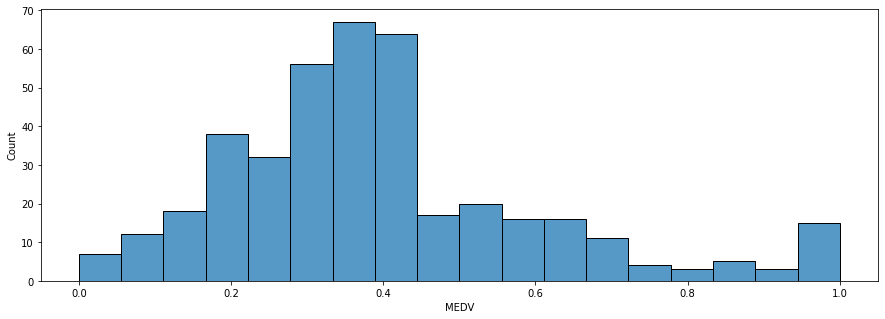

In [ ]:
# Inspect the target after normalization
plt.figure(figsize=(15,5))
sns.histplot(data=y_train, x='MEDV')
plt.show()

In [ ]:
# Normalize the test set with the same parameters of training set
X_test = (X_test - min_df)/(max_df - min_df)
y_test = (y_test - min_t)/(max_t - min_t)

### Build the model

Sum of Squared Errors (SSE):
$$\mathrm{SSE} (y, \hat{y}) = \sum^N_{n=0}(y_n - \hat{y_n})^2 = \sum^N_{n=0}(y_n - g(x_n|w))^2$$

Mean Squared Error (MSE):
$$\mathrm{MSE} (y, \hat{y}) = \frac{1}{N} \sum^N_{n=0}(y_n - \hat{y_n})^2 = \frac{\mathrm{SSE} (y, \hat{y})}{N}$$

In [ ]:
input_shape = X_train.shape[1:]

In [ ]:
def build_ffnn(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer1 = tfkl.Dense(units=64, activation='relu', name='Hidden1')(input_layer)
    hidden_layer2 = tfkl.Dense(units=64, activation='relu', name='Hidden2')(hidden_layer1)
    output_layer = tfkl.Dense(units=1, activation='linear', name='Output')(hidden_layer2)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='FFNN')

    # Compile the model
    loss = tfk.losses.MeanSquaredError()
    learning_rate = 0.2
    optimizer = tfk.optimizers.SGD(learning_rate)
    model.compile(loss=loss, optimizer=optimizer)

    # Return the model
    return model

Model: "FFNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 13)]              0         
                                                                 
 Hidden1 (Dense)             (None, 64)                896       
                                                                 
 Hidden2 (Dense)             (None, 64)                4160      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


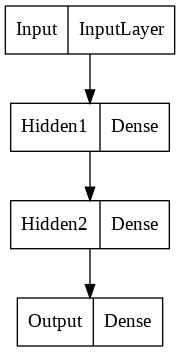

In [ ]:
ffnn = build_ffnn(input_shape)
ffnn.summary()
tfk.utils.plot_model(ffnn)

### Train the model

In [ ]:
batch_size = 64
epochs = 5000

In [ ]:
history = ffnn.fit(
    x = X_train,
    y = y_train, 
    batch_size = batch_size,
    epochs = epochs
).history

Streaming output truncated to the last 5000 lines.
7/7 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 2502/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 2503/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 2504/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 2505/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 2506/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 2507/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 2508/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 2509/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 2510/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 2511/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 2512/5000
7/7 [==============================] - 0s 3ms/s

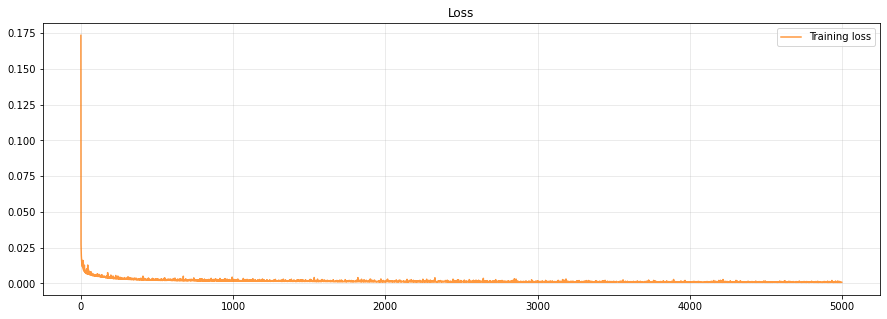

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
def plot_residuals(model, X_, y_):
    X_['sort'] = y_
    X_ = X_.sort_values(by=['sort'])
    y_ = np.expand_dims(X_['sort'], 1)
    X_.drop(['sort'], axis=1, inplace=True)

    y_pred = model.predict(X_)
    SSE = np.square(y_pred - y_)
    MSE = np.mean(SSE)

    print('Mean Squared Error (MSE):', MSE)
    # mpl.rcParams.update(mpl.rcParamsDefault)
    # sns.set(font_scale=1.1, style=None, palette='Set1')
    plt.figure(figsize=(15,5))
    plt.scatter(np.arange(len(y_)), y_, label='True')
    plt.scatter(np.arange(len(y_pred)), y_pred, label='Prediction')
    
    for i in range(len(y_)):
        if(y_[i]>=y_pred[i]):
            plt.vlines(i,y_pred[i],y_[i],alpha=.5)
        else:
            plt.vlines(i,y_[i],y_pred[i],alpha=.5)
            
    plt.legend()
    plt.grid(alpha=.3)
    plt.show()

Mean Squared Error (MSE): 0.0009140836864331821


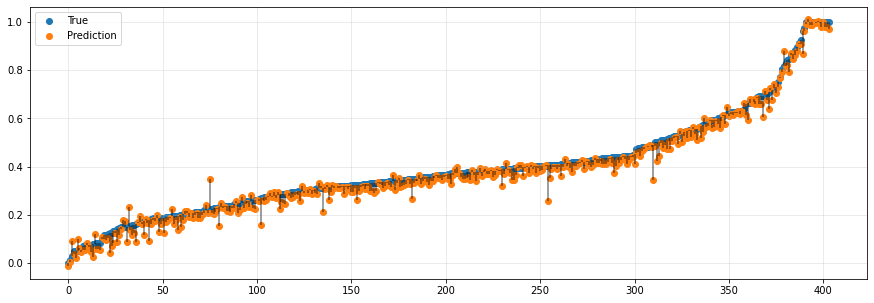

In [ ]:
plot_residuals(ffnn, X_train.copy(), y_train.copy())

Mean Squared Error (MSE): 0.004572770814330366


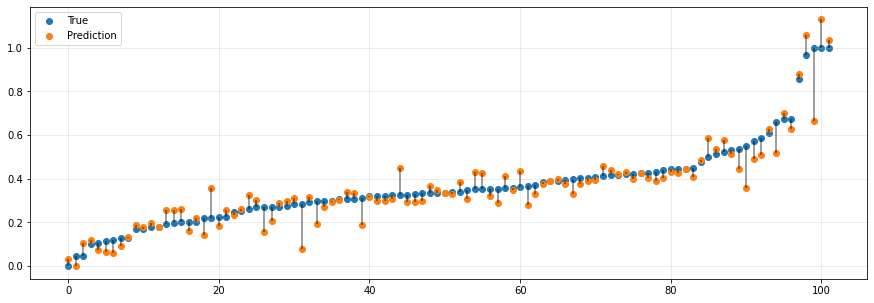

In [ ]:
plot_residuals(ffnn, X_test.copy(), y_test.copy())

In [ ]:
# Save the trained model
ffnn.save('MyFirstFFNN')

INFO:tensorflow:Assets written to: MyFirstFFNN/assets


INFO:tensorflow:Assets written to: MyFirstFFNN/assets


Guess, what is happening?